<a href="https://colab.research.google.com/github/asepmuhidin/MK-Data-Mining-UPB/blob/main/outlier_scaling_c3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
df.drop(columns=['Index'], inplace=True)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [4]:
df['tinggi']=df['Height(Inches)'].apply(lambda x:x*2.54)
df['berat']=df['Weight(Pounds)'].apply(lambda x:x*0.453592)
df.head()

,Height(Inches),Weight(Pounds),tinggi,berat
0,65.78331,112.9925,167.089607,51.252494
1,71.51521,136.4873,181.648633,61.909547
2,69.39874,153.0269,176.272800,69.411778
3,68.21660,142.3354,173.270164,64.562199
4,67.78781,144.2971,172.181037,65.452010


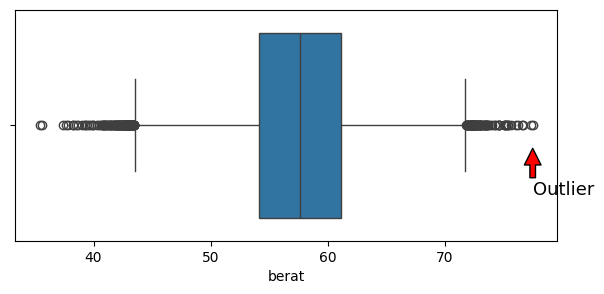

In [5]:
plt.figure(figsize=(7,3))
sns.boxplot(df.berat, orient='h')
plt.annotate("Outlier",(df.berat.max(),0.1),xytext=(df.berat.max(),0.3)
,arrowprops=dict(facecolor='red'),fontsize=13);

In [ ]:
#Tugas 1: Buat grafik boxplot untuk data tinggi

In [7]:
#Menentukan batas atas dan bawah BERAT
q1_berat=df.berat.describe()['25%']
q2_berat=df.berat.describe()['50%']
q3_berat=df.berat.describe()['75%']
iqr_berat=q3_berat-q1_berat
batas_bawah_berat=q1_berat-(1.5*iqr_berat)
batas_atas_berat=q3_berat+(1.5*iqr_berat)
print(f"Q1 Berat={q1_berat}")
print(f"Q2 Berat={q2_berat}")
print(f"Q3 Berat={q3_berat}")
print(f"IQR berat={iqr_berat}")
print(f"batas bawah berat={batas_bawah_berat}")
print(f"batas atas berat={batas_atas_berat}")

Q1 Berat=54.1174605106
Q2 Berat=57.677738138
Q3 Berat=61.186317617200004
IQR berat=7.0688571066000065
batas bawah berat=43.51417485069999
batas atas berat=71.78960327710001


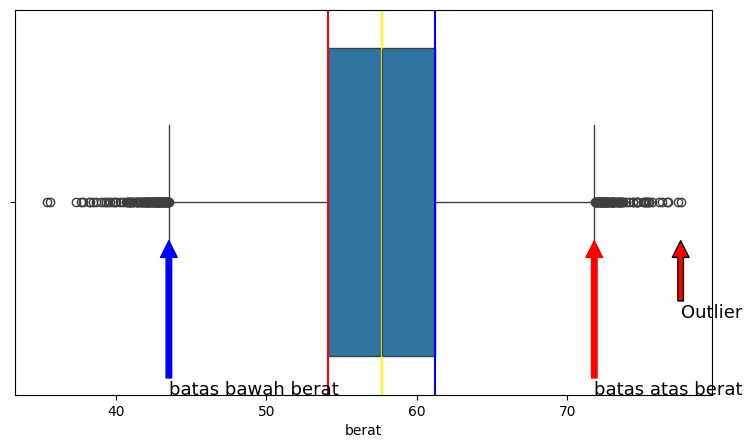

In [8]:
#Grafik batas atas dan bawah BERAT
plt.figure(figsize=(9,5))
sns.boxplot(df.berat, orient='h')
plt.annotate("Outlier",(df.berat.max(),0.1),xytext=(df.berat.max(),0.3)
,arrowprops=dict(facecolor='red'),fontsize=13)
plt.axvline(q1_berat,color='red', label='Q1')
plt.axvline(q2_berat,color='yellow', label='Q2')
plt.axvline(q3_berat,color='blue', label='Q3')
plt.annotate('batas bawah berat',(batas_bawah_berat,0.1),(batas_bawah_berat,0.5),
arrowprops=dict(color='blue'),fontsize=13)
plt.annotate('batas atas berat',(batas_atas_berat,0.1),(batas_atas_berat,0.5),
arrowprops=dict(color='red'), fontsize=13);

In [ ]:
#Tugas 2: Menentukan batas atas dan bawah TINGGI

In [ ]:
#Tugas 3: Menentukan GRAFIK batas atas dan bawah TINGGI

In [9]:
#Filter dataset berdasarkan data batas atas dan bawah BERAT
df_n=df[(df.berat>=batas_bawah_berat) & (df.berat<=batas_atas_berat) ].copy()
df_n.head()

,Height(Inches),Weight(Pounds),tinggi,berat
0,65.78331,112.9925,167.089607,51.252494
1,71.51521,136.4873,181.648633,61.909547
2,69.39874,153.0269,176.272800,69.411778
3,68.21660,142.3354,173.270164,64.562199
4,67.78781,144.2971,172.181037,65.452010


In [ ]:
#Tugas 4: Filter dataset berdasarkan data batas atas dan bawah TINGGI

In [20]:
def minmax(x,x_min,x_max):
  return (x-x_min)/(x_max-x_min)
def standarisasi(x,mean,std):
  return (x-mean)/std

In [22]:
min=df_n.tinggi.min()
max=df_n.tinggi.max()
df_n['tinggi_scl']=df.apply(lambda x: minmax(x['tinggi'],min,max), axis=1)
min_berat=df_n.berat.min()
max_berat=df_n.berat.max()
df_n['berat_scl']=df.apply(lambda x: minmax(x['berat'],min_berat,max_berat),
axis=1)

In [23]:
df_n.head()

,Height(Inches),Weight(Pounds),tinggi,berat,tinggi_scl,berat_scl
0,65.78331,112.9925,167.089607,51.252494,0.370095,0.273498
1,71.51521,136.4873,181.648633,61.909547,0.755447,0.650634
2,69.39874,153.0269,176.272800,69.411778,0.613158,0.916126
3,68.21660,142.3354,173.270164,64.562199,0.533683,0.744507
4,67.78781,144.2971,172.181037,65.452010,0.504856,0.775996


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
X=df_n.iloc[:,[4]].values
y=df_n.iloc[:,[5]].values

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
regresi=LinearRegression()
regresi.fit(x_train,y_train)
predict=regresi.predict(x_test)

In [29]:
mae=mean_absolute_error(y_test,predict)
r2=r2_score(y_test,predict)
print(f"MAE : {mae}, R2 : {r2}")

MAE : 0.12525962788486525, R2 : 0.24883849085402987
